In [1]:
import datetime
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"="*8 + "%s"%nowtime)

printbar()


========2024-05-31 15:18:12


### Load data

In [2]:
import numpy as np
no_smoker_cpmgpr1d = np.load(r'MTBLS374_nosmoker_cpmgpr1d.npy')
smoker_cpmgpr1d = np.load(r'MTBLS374_smoker_cpmgpr1d.npy')
no_smoker_noesypr1d = np.load(r'MTBLS374_nosmoker_noesypr1d.npy')
smoker_noesypr1d = np.load(r'MTBLS374_smoker_noesypr1d.npy')
noesypr_np = np.vstack((no_smoker_noesypr1d, smoker_noesypr1d))
cpmgpr_np = np.vstack((no_smoker_cpmgpr1d,  smoker_cpmgpr1d))
noesypr_np.shape, cpmgpr_np.shape


((113, 131072), (113, 131072))

In [3]:
print('cpmgpr1d sw:',20.0123/2+4.702, 4.702-20.0123/2, '\nnoesypr1d sw:',30.0184/2+4.702, 4.702-30.0184/2)

cpmgpr1d sw: 14.70815 -5.30415 
noesypr1d sw: 19.711199999999998 -10.3072


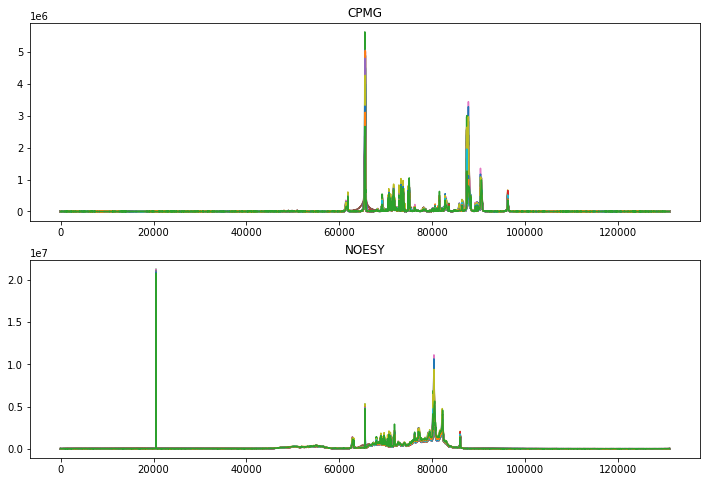

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(cpmgpr_np.T )
plt.title("CPMG")
plt.subplot(2,1,2)
plt.plot(noesypr_np.T )
plt.title("NOESY")
plt.show()

In [5]:
ppm_20 = np.linspace(14.7082, -5.3042, 128*1024)
for i in range(0, 128*1024):
    if ppm_20[i] < 9: 
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break
for i in range(0, 128*1024):
    if ppm_20[i] < 0.2: 
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break    

9.000 ppm, 37386 point
0.200 ppm, 95022 point


In [6]:
for i in range(0, 128*1024):
    if ppm_20[i] < 5.17:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break
for i in range(0, 128*1024):
    if ppm_20[i] < 4.5:
        print('{:.3f} ppm, {} point'.format(ppm_20[i], i) )
        break    

5.170 ppm, 62471 point
4.500 ppm, 66859 point


In [7]:
# normalization 
cpmgpr_np -= np.min(np.hstack((cpmgpr_np[:,:62471], cpmgpr_np[:,66859:])), axis=1).reshape(-1, 1)
cpmgpr_np /= np.max(np.hstack((cpmgpr_np[:,:62471], cpmgpr_np[:,66859:])), axis=1).reshape(-1, 1)
# δ5.17 − 4.5 water region were removed
cpmgpr_np[:, 62471:66859] = 0

In [8]:
# 9-0.2 ppm, cut cpmgpr
cpmgpr_np_clean = cpmgpr_np[:,37386:95022]
cpmgpr_np.shape, cpmgpr_np_clean.shape   

((113, 131072), (113, 57636))

In [9]:
noesypr1d_20 = np.load(r'E:\Desktop\temp_pictures\nmr_data\MTBLS374_noesypr1d_data.npy')
# normalization 
noesypr1d_20 -= np.min(np.hstack((noesypr1d_20[:,:62471], noesypr1d_20[:,66859:])), axis=1).reshape(-1, 1)
noesypr1d_20 /= np.max(np.hstack((noesypr1d_20[:,:62471], noesypr1d_20[:,66859:])), axis=1).reshape(-1, 1)
noesypr1d_20[:, 62471:66859] = 0
noesypr1d_20.shape   

(113, 131072)

In [10]:
ledbp_nmr_120 = np.load(r'ac_120plasma_ledbp.npy')
ledbp_nmr_120 -= ledbp_nmr_120[:,80000:95000].min(1).reshape(-1,1)
ledbp_nmr_120 /= ledbp_nmr_120[:,80000:95000].max(1).reshape(-1,1)
ledbp_nmr_120[:,63300:66800] = 0
ledbp_nmr_120.shape  

(120, 131072)

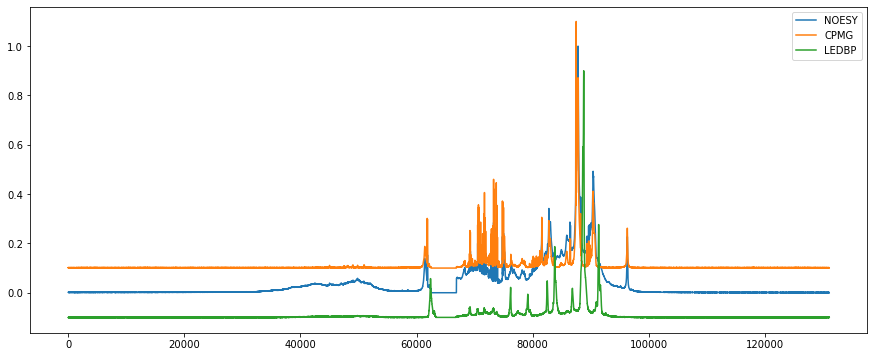

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(noesypr1d_20[0], label = 'NOESY')
plt.plot(cpmgpr_np[0]+0.1, label ='CPMG')
plt.plot(ledbp_nmr_120[0]-0.1, label ='LEDBP')
plt.legend()
plt.show()

In [12]:
import numpy as np
from numpy import exp, pi
t32 = np.linspace(0, 1, 32*1024)
sw32 = np.linspace(0, len(t32)/t32.max(), len(t32))
def spec( f, T2, t, A0=1 ):
    fid = A0*exp(1j*2*pi*(f)*t)*exp(-t/T2)
    spec_tep = np.fft.fft(fid)/(np.fft.fft(fid).real.max()) 
    return  spec_tep - spec_tep.real.min()

In [13]:
from scipy.signal import find_peaks, peak_widths
height = 0.02  
spe_cpmgpr_w = []
for spe_cpmgpr in cpmgpr_np:
    peaks_cpmgpr, _ = find_peaks(spe_cpmgpr, height=height, prominence=0.01)
    results_half0 = peak_widths(spe_cpmgpr, peaks_cpmgpr, rel_height=0.5)
    spe_cpmgpr_w.append(results_half0[0])
spe_noesypr_w = []
for spe_noesypr in  noesypr1d_20:
    peaks_noesypr, _ = find_peaks(spe_noesypr, height=height, prominence=0.01)
    results_half1 = peak_widths(spe_noesypr, peaks_noesypr, rel_height=0.5)
    spe_noesypr_w.append(results_half1[0]) 
spe_ledbp_w = []
for  spe_ledbp in  ledbp_nmr_120:
    peaks_ledbp, _ = find_peaks(spe_ledbp, height=height, prominence=0.02)
    results_half2 = peak_widths(spe_ledbp, peaks_ledbp, rel_height=0.5)
    spe_ledbp_w.append(results_half2[0])   

print(len(spe_cpmgpr_w), len(spe_noesypr_w), len(spe_ledbp_w))

113 113 120


In [14]:
def read_list(list_of_lists):
    list_out = []
    for inner_list in list_of_lists:
        for item in inner_list:
            list_out.append(item)
    return list_out

In [15]:
spe_cpmgpr_w_all = read_list(spe_cpmgpr_w) 
spe_noesypr_w_all = read_list(spe_noesypr_w)  
spe_ledbp_w_all = read_list(spe_ledbp_w)  

len(spe_cpmgpr_w_all), len(spe_noesypr_w_all), len(spe_ledbp_w_all)

(13449, 11709, 1887)

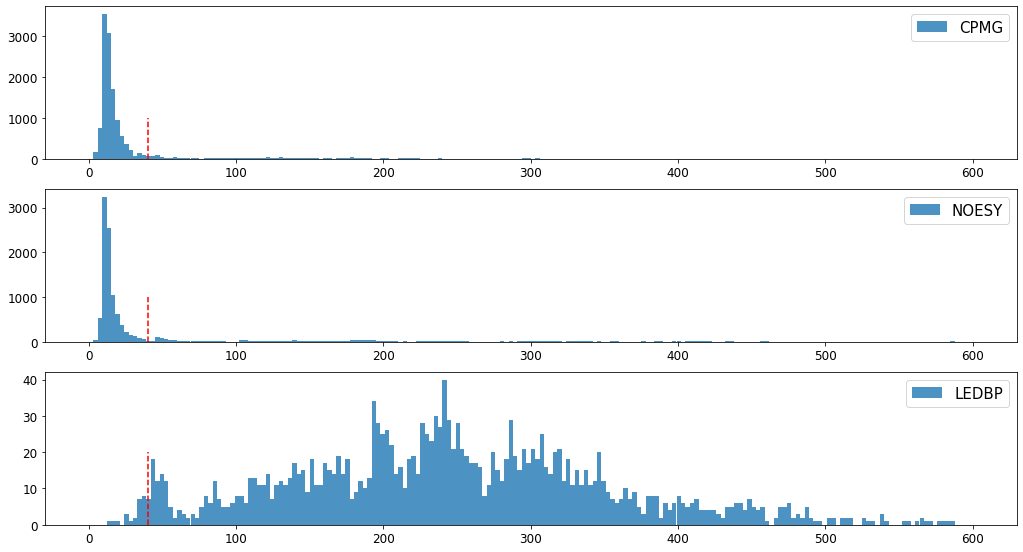

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(3,1,1)
plt.hist(spe_cpmgpr_w_all, range=[0,600],bins=200, alpha=0.8, label='CPMG')
plt.vlines(40, 0, 1000, linestyles='--', color = 'r')
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=12)
plt.subplot(3,1,2)
plt.hist(spe_noesypr_w_all, range=[0,600],bins=200, alpha=0.8, label='NOESY')
plt.vlines(40, 0,1000, linestyles='--', color = 'r')
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=12)
plt.subplot(3,1,3)
plt.hist(spe_ledbp_w_all, range=[0,600],bins=200, alpha=0.8, label='LEDBP')
plt.vlines(40, 0,20, linestyles='--', color = 'r')
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.subplots_adjust(top=0.95,bottom=0.05,left=0.05 ,right=0.95,hspace=0.2,wspace=0.2)
plt.tick_params(labelsize=12)
plt.show()

In [17]:
from scipy.signal import find_peaks, peak_widths
height = 0.004  
spe  =  cpmgpr_np.mean(0)   
peaks, _ = find_peaks(spe, height=height, prominence=0.005)
results_half = peak_widths(spe, peaks, rel_height=0.5)
spec_all_small = 0
for p, w, h, pro in zip(peaks, results_half[0], results_half[1], _['prominences']): 
    if w <= 40:  
        spec_all_small += pro*spec(int(p/4),1/(3.14*w*0.25),t32,1)

spec_all_small_128 = np.fft.fft(np.fft.ifft(spec_all_small), 128*1024).real
spec_all_small_128.shape   

(131072,)

In [18]:
output_mean_374 = np.load(r'MTBLS374_SENNet_output_mean.npy')
output_mean_374.shape

(131072,)

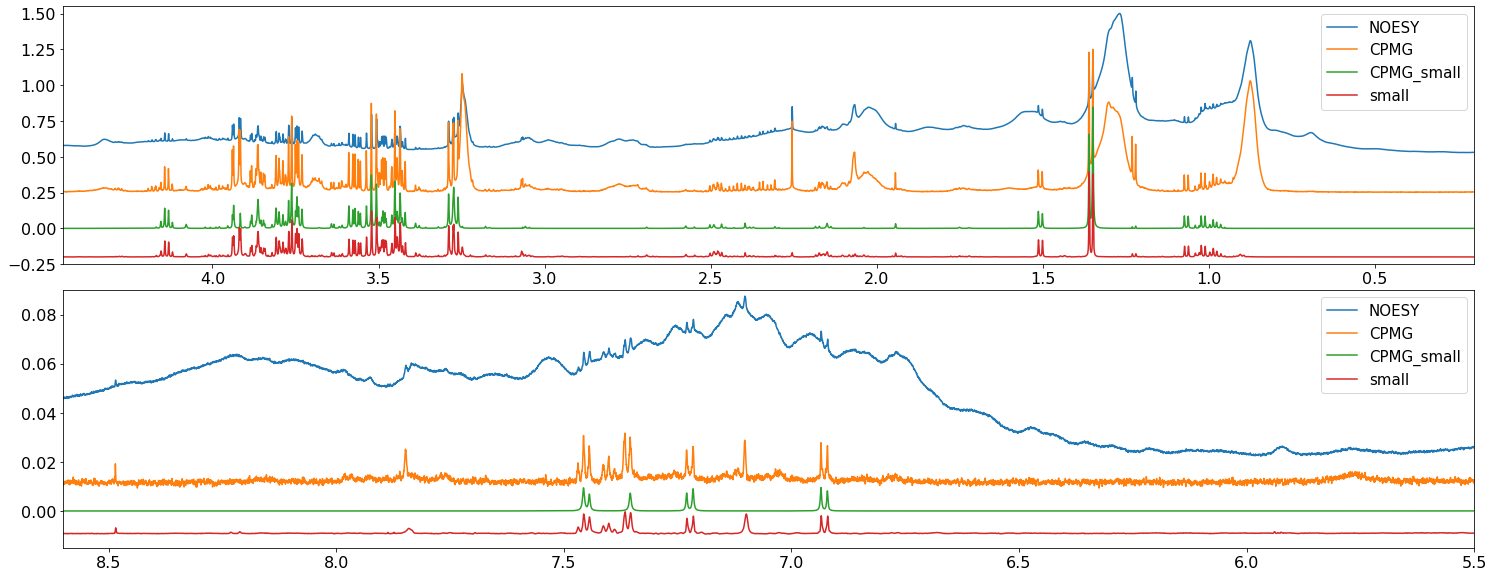

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(ppm_20, noesypr1d_20[-1] + 0.5, label = 'NOESY') 
plt.plot(ppm_20, cpmgpr_np[-1] + 0.25, label = 'CPMG')
plt.plot(ppm_20, spec_all_small_128*1 , label = 'CPMG_small') 
plt.plot(ppm_20, output_mean_374*1.5-0.2 , label = 'small')
plt.xlim(4.45, 0.2)
plt.ylim(-0.25, 1.05+0.5)
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.subplots_adjust(top=0.99,bottom=0.05,left=0.01 ,right=0.99,hspace=0.1,wspace=0.2)
plt.tick_params(labelsize=16)
plt.subplot(2,1,2)
plt.plot(ppm_20, noesypr1d_20[-1] + 0.015 , label = 'NOESY') 
plt.plot(ppm_20, cpmgpr_np[-1] + 0.009 , label = 'CPMG')
plt.plot(ppm_20, spec_all_small_128*1 , label = 'CPMG_small') 
plt.plot(ppm_20, output_mean_374*1.5-0.01 , label = 'small')
plt.xlim(8.6, 5.5)
plt.ylim(-0.015,0.09)
plt.legend(fontsize=15, markerscale=1.5, scatterpoints=1)
plt.tick_params(labelsize=16)
plt.subplots_adjust(top=0.99,bottom=0.05,left=0.01 ,right=0.99,hspace=0.1,wspace=0.2)
plt.show()

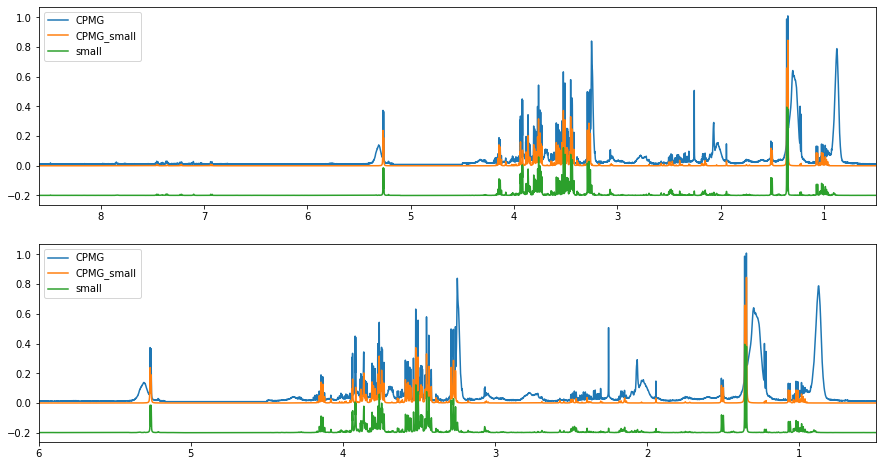

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(ppm_20, cpmgpr_np[-1] + 0.009 , label = 'CPMG')
plt.plot(ppm_20, spec_all_small_128*1 , label = 'CPMG_small') 
plt.plot(ppm_20, output_mean_374*1.5-0.2 , label = 'small')
plt.xlim(8.6, 0.5)
plt.legend()
plt.subplot(2,1,2)
plt.plot(ppm_20, cpmgpr_np[-1] + 0.009 , label = 'CPMG')
plt.plot(ppm_20, spec_all_small_128*1 , label = 'CPMG_small') 
plt.plot(ppm_20, output_mean_374*1.5-0.2 , label = 'small')
plt.legend()
plt.xlim(6, 0.5)
plt.show()